In [8]:
import cv2
import numpy as np

In [9]:
imgcv = cv2.imread('../Reference files/fruits.png', 0)
# imgcv = cv2.imread('cavepainting1.JPG', 0)
blur = cv2.GaussianBlur(imgcv,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
def gradient_x(imggray):
	##Sobel operator kernels.
	kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
	return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
	kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
	return sig.convolve2d(imggray, kernel_y, mode='same')

img = cv2.imread('cavepainting1.JPG')
imggray = cv2.imread('cavepainting1.JPG', 0)

blur = cv2.GaussianBlur(imggray,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

I_x = gradient_x(th3)
I_y = gradient_y(th3)

Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

k = 0.04
detA = Ixx * Iyy - Ixy ** 2
traceA = Ixx + Iyy
harris_response = detA - k * traceA ** 2
corners = corner_peaks(harris_response)

img_copy_for_corners = np.copy(img)

# for rowindex, response in enumerate(corners):
# 	for colindex, r in enumerate(response):
# 		if r > 0:
# 			# this is a corner
# 			img_copy_for_corners[rowindex, colindex] = [0,0,0]

for corner in corners:
	x, y = corner[0], corner[1]
	img_copy_for_corners[x, y] = [0,0,255]

cv2.imwrite("finalimage.png", img_copy_for_corners)

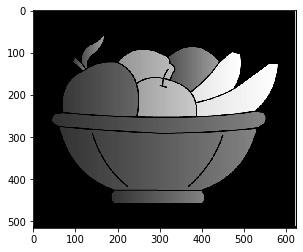

In [14]:
plt.imshow(imgcv, cmap='gray')

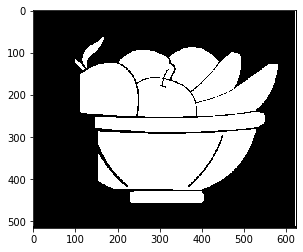

In [15]:
plt.imshow(np.uint8(th3), cmap='gray')
plt.show()

In [16]:
def isvalid(i, j, r, c):
    if i >= r or j >= c or i < 0 or j < 0:
        return 0
    return 1

def dfs_visit(image, visited, i, j, count):

    r, c = image.shape
    visited[i][j] = 255
    for k in range(i-1, i+2):
        for l in range(j-1, j+2):
            if isvalid(k, l, r, c):
                if (visited[i][j]==0 and image[i][j]==255):
                    dfs_visit(image, visited, k, l, count)

    return visited

def connected_component(image):

    r, c = image.shape
    count=1

    visited = np.zeros([r, c])

    for i in range(r):
        for j in range(c):
            if isvalid(i, j, r, c):
                if (visited[i][j]==0 and image[i][j]==255):
                    visited = dfs_visit(image, visited, i, j, count)
                    count+=1
    return visited

In [17]:
cc=connected_component(th3)

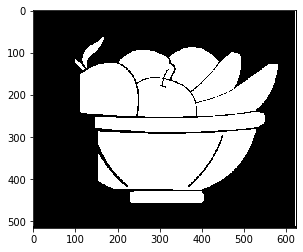

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.uint8(cc), cmap='gray')
plt.show()

In [ ]:
hist, _ = np.histogram(imgcv, bins=256, range=(0, 255))

In [ ]:
def otsu(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    total = image.shape[0]*image.shape[1]
    current_max, threshold = 0, 0
    sumT, sumF, sumB = 0, 0, 0
    for i in range(0,256):
        sumT += i * hist[i]
    weightB, weightF = 0, 0
    varBetween, meanB, meanF = 0, 0, 0
    for i in range(0,256):
        weightB += hist[i]
        weightF = total - weightB
        if weightF == 0:
            break
        sumB += i*hist[i]
        sumF = sumT - sumB
        meanB = sumB/weightB
        meanF = sumF/weightF
        varBetween = weightB * weightF
        varBetween *= (meanB-meanF)*(meanB-meanF)
        if varBetween > current_max:
            current_max = varBetween
            threshold = i 
    print("threshold is:", threshold) 
    
    return threshold

In [ ]:
x=otsu(imgcv)

In [ ]:
y=imgcv
y[y>=x]=255
y[y<x]=0

In [ ]:
plt.imshow(np.uint8(y), cmap='gray')
plt.show()